In [2]:
import torch
import matplotlib.pyplot as plt
from useful_functions_notebook_14to18 import *
from useful_functions_notebook_8to13 import variable_consistancy_check, mass_not_preserved_percentage_decrease, check_branch_length, analyze_data
from IPython.display import display, HTML
from IPython.display import display
display(HTML("<style>.container { width:70% !important; }</style>"))
transform = transforms.Resize((29, 10))
original = torch.load('data/dataset_distlognorm_massnorm.pt')

FileNotFoundError: [Errno 2] No such file or directory: 'data/dataset_distlognorm_massnorm.pt'

# test1
- consistent training data only
- bilinear interpolation
- linear noise scheduler
- T = 1200
- epochs = 1000

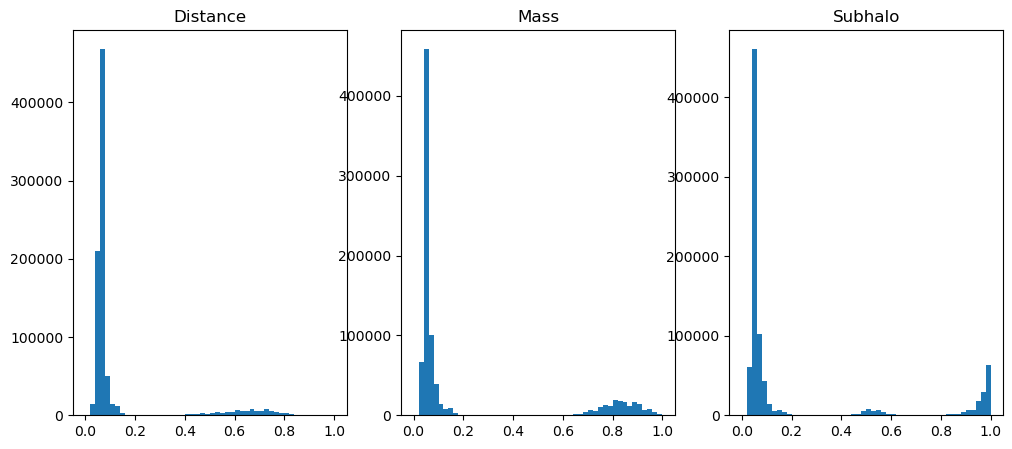

In [44]:

bilinear = torch.load("../testing/good_model/generated_image_epochs=1000_BILINEAR_T=1200_linear.pt", map_location = "cpu")
bilinear = transform(bilinear.to(dtype=torch.float))
bilinear = normalize(bilinear, True, [0, 1, 2])


dist = bilinear[:, 0]
mass = bilinear[:, 1]
subh = bilinear[:, 2]

fig, axs = plt.subplots(1, 3, figsize=(12, 5))

# Display the first image in the first subplot
axs[0].hist(dist.numpy().flatten(), bins = 50)
axs[0].set_title('Distance')

# Display the second image in the second subplot
axs[1].hist(mass.numpy().flatten(), bins = 50)
axs[1].set_title('Mass')

# Display the second image in the second subplot
axs[2].hist(subh.numpy().flatten(), bins = 50)
axs[2].set_title('Subhalo')

plt.show()

In [49]:
# dist
print("dist:")
lower_threshold = 0.24
upper_threshold = 0.26
count_between_thresholds = torch.sum((dist > lower_threshold) & (dist < upper_threshold)).item()
total_elements = dist.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")

print("mass:")
lower_threshold = 0.2
upper_threshold = 0.57
count_between_thresholds = torch.sum((mass > lower_threshold) & (mass < upper_threshold)).item()
total_elements = mass.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")

print("subh:")
lower_threshold = 0.26
upper_threshold = 0.40
count_between_thresholds = torch.sum((subh > lower_threshold) & (subh < upper_threshold)).item()
total_elements = subh.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")
lower_threshold = 0.7
upper_threshold = 0.74
count_between_thresholds = torch.sum((subh > lower_threshold) & (subh < upper_threshold)).item()
total_elements = subh.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")


dist:
Percentage of values between 0.24 and 0.26: 0.00%

mass:
Percentage of values between 0.2 and 0.57: 0.00%

subh:
Percentage of values between 0.26 and 0.4: 0.00%

Percentage of values between 0.7 and 0.74: 0.00%



In [50]:
bilinear = transform_diffusion_image(bilinear, d_thresh = 0.25, m_tresh = 0.55, s_low = 0.35, s_high = 0.72)


bilinear_con, bilinear_incon = check_consistency(bilinear)



Percentage of consistant images = 96.73%

Inconsistency reasons:
inconsistency due to zero / nonzero mistake = 0.00%
inconsistency due to distance not zero in main branch =  0.00%
inconsistency due to gap between branches =  81.63%
inconsistency due to zgap in branch 18.37%
inconsistency due to last descendant dont exist 0.00%

Number of images with two or more inconsistencies = 0, which is  0.00%
That corresponds to 0.00% of all images


Of all images, 0.00% have zero inconsistency
Of all images, 0.00% have distance main branch inconsistency
Of all images, 2.67% have gap between branches inconsistency
Of all images, 0.60% have gap within branch inconsistency
Of all images, 0.00% have last descendant inconsistency


MASS:
monotonicity threshold = -1e-06% change
number of occurences where mass is not preserved = 49615
perc of occurences where mass is not preserved = 30.34% vs. 25.77% in training data




monotonicity threshold = -0.01% change
number of occurences where mass is not preserved = 31836
perc of occurences where mass is not preserved = 19.47% vs. 11.12% in training data




monotonicity threshold = -0.05% change
number of occurences where mass is not preserved = 9563
perc of occurences where mass is not preserved = 5.85% vs. 1.71% in training data




monotonicity threshold = -0.1% change
number of occurences where mass is not preserved = 3755
perc of occurences where mass is not preserved = 2.30% vs. 0.32% in training data







DISTANCE:
total distance progentors = 93337 
number of occurences where distance increase (not preserved) = 42227
perc of occurences where mass increase (not preserved) = 45.24% vs. 49.67% in training data


total branches where the last halo distance to main b

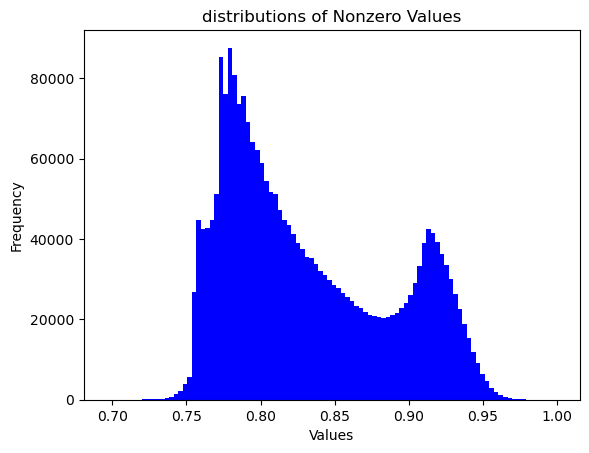

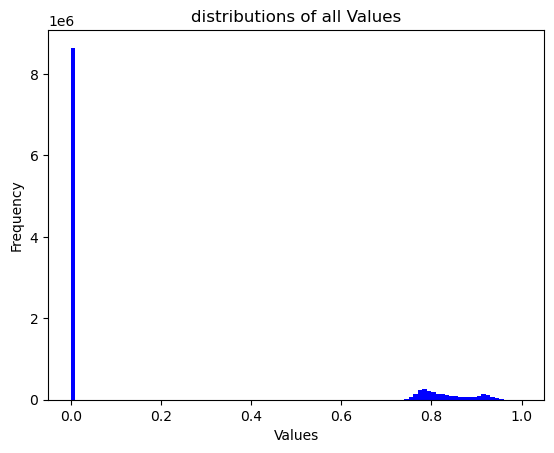

number of nonzero values = 2475374
Generated images:


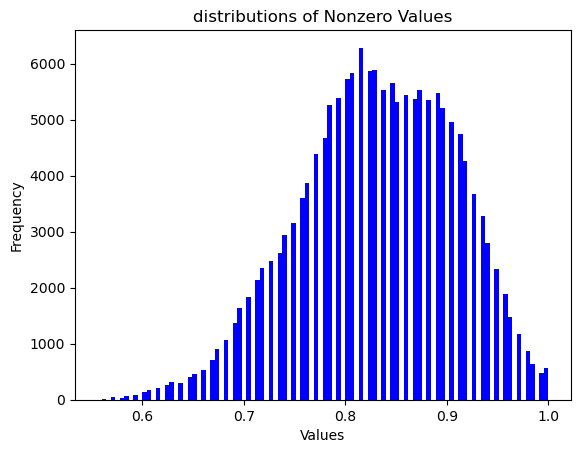

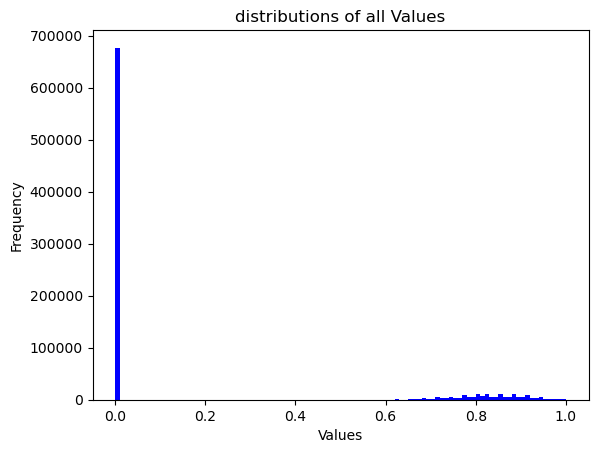

number of nonzero values = 164944


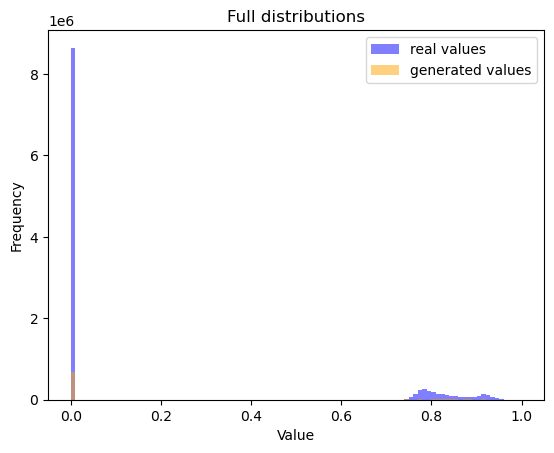

Full distribution:
KS Statistic: 0.05853606078180651
P-value: 0.0

According to regular significance level of 0.05:
The distributions are significantly different (reject H0)

According to large sample significance level of 0.05, giving significance level of 0.0015:
The distributions are significantly different (reject H0), KS statistic 0.0585 > 0.0015


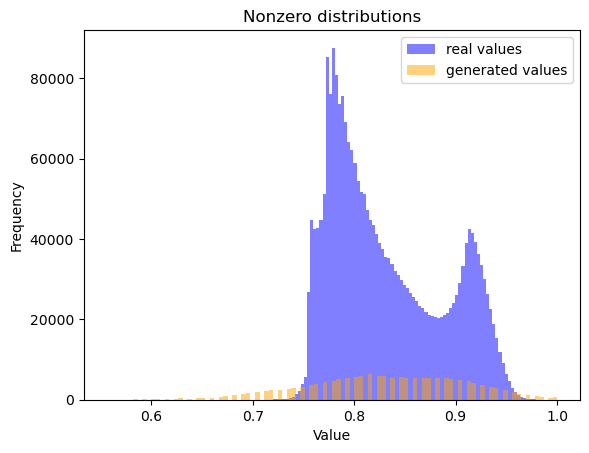

Nonzero distribution:
KS Statistic: 0.16511630263533633
P-value: 0.0

According to regular significance level of 0.05:
The distributions are significantly different (reject H0)

According to large sample significance level of 0.05, giving significance level of 0.0035:
The distributions are significantly different (reject H0), KS statistic 0.1651 > 0.0035


(0.05853606078180651, 0.16511630263533633)

In [51]:
variable_consistancy_check(bilinear_con, False)
avg_branch = check_branch_length(bilinear_con)
ks_test(original, bilinear_con, dim = 1)

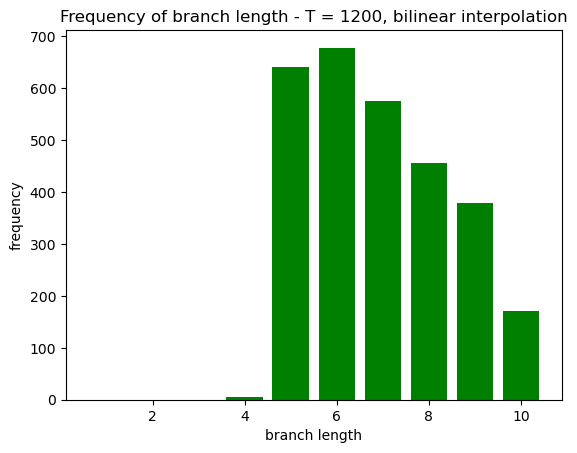

In [42]:
num_branches = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
length = [0, 0, 0, 5, 641, 678, 575, 455, 378, 170]

plt.bar(num_branches, length, color = "g")

# Add title and labels
plt.title('Frequency of branch length - T = 1200, bilinear interpolation')
plt.xlabel('branch length')
plt.ylabel('frequency')

# Show the plot
plt.show()

# test2
- consistent training data only
- nearest exact interpolation
- linear noise scheduler
- T = 1200
- epochs = 1000

In [4]:

nearest = torch.load("../testing/good_model/generated_image_epochs=1000_NEAREST_EXACT_T=1200_linear.pt", map_location = "cpu")
print(nearest.shape)
nearest = transform(nearest.to(dtype=torch.float))
print(nearest.shape)
nearest = normalize(nearest, True, [0, 1, 2])
print(nearest.shape)



FileNotFoundError: [Errno 2] No such file or directory: '../testing/good_model/generated_image_epochs=1000_NEAREST_EXACT_T=1200_linear.pt'

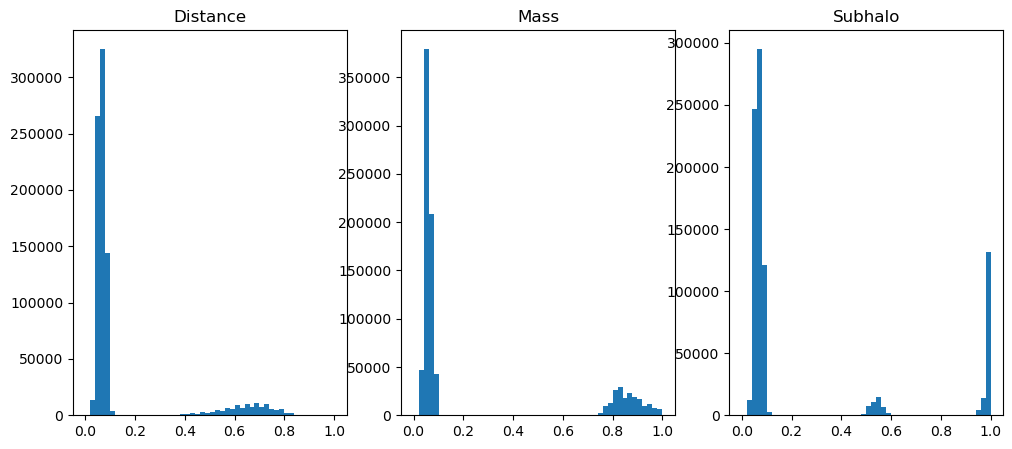

In [93]:

nearest = torch.load("../testing/good_model/generated_image_epochs=1000_NEAREST_EXACT_T=1200_linear.pt", map_location = "cpu")
nearest = transform(nearest.to(dtype=torch.float))
nearest = normalize(nearest, True, [0, 1, 2])


dist = nearest[:, 0]
mass = nearest[:, 1]
subh = nearest[:, 2]

fig, axs = plt.subplots(1, 3, figsize=(12, 5))

# Display the first image in the first subplot
axs[0].hist(dist.numpy().flatten(), bins = 50)
axs[0].set_title('Distance')

# Display the second image in the second subplot
axs[1].hist(mass.numpy().flatten(), bins = 50)
axs[1].set_title('Mass')

# Display the second image in the second subplot
axs[2].hist(subh.numpy().flatten(), bins = 50)
axs[2].set_title('Subhalo')

plt.show()

In [94]:
# dist
print("dist:")
lower_threshold = 0.19
upper_threshold = 0.26
count_between_thresholds = torch.sum((dist > lower_threshold) & (dist < upper_threshold)).item()
total_elements = dist.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")

print("mass:")
lower_threshold = 0.12
upper_threshold = 0.72
count_between_thresholds = torch.sum((mass > lower_threshold) & (mass < upper_threshold)).item()
total_elements = mass.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")

print("subh:")
lower_threshold = 0.12
upper_threshold = 0.48
count_between_thresholds = torch.sum((subh > lower_threshold) & (subh < upper_threshold)).item()
total_elements = subh.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")
lower_threshold = 0.63
upper_threshold = 0.91
count_between_thresholds = torch.sum((subh > lower_threshold) & (subh < upper_threshold)).item()
total_elements = subh.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")


dist:
Percentage of values between 0.19 and 0.26: 0.00%

mass:
Percentage of values between 0.12 and 0.72: 0.00%

subh:
Percentage of values between 0.12 and 0.48: 0.00%

Percentage of values between 0.63 and 0.91: 0.00%



In [95]:
nearest = transform_diffusion_image(nearest, d_thresh = 0.25, m_tresh = 0.69, s_low = 0.35, s_high = 0.77)

nearest_con, nearest_incon = check_consistency(nearest)



Percentage of consistant images = 94.97%

Inconsistency reasons:
inconsistency due to zero / nonzero mistake = 0.00%
inconsistency due to distance not zero in main branch =  0.00%
inconsistency due to gap between branches =  81.46%
inconsistency due to zgap in branch 19.21%
inconsistency due to last descendant dont exist 0.00%

Number of images with two or more inconsistencies = 1, which is  0.66%
That corresponds to 0.03% of all images


Of all images, 0.00% have zero inconsistency
Of all images, 0.00% have distance main branch inconsistency
Of all images, 4.10% have gap between branches inconsistency
Of all images, 0.97% have gap within branch inconsistency
Of all images, 0.00% have last descendant inconsistency


MASS:
monotonicity threshold = -1e-06% change
number of occurences where mass is not preserved = 58033
perc of occurences where mass is not preserved = 32.23% vs. 25.77% in training data




monotonicity threshold = -0.01% change
number of occurences where mass is not preserved = 38662
perc of occurences where mass is not preserved = 21.47% vs. 11.12% in training data




monotonicity threshold = -0.05% change
number of occurences where mass is not preserved = 3687
perc of occurences where mass is not preserved = 2.05% vs. 1.71% in training data




monotonicity threshold = -0.1% change
number of occurences where mass is not preserved = 194
perc of occurences where mass is not preserved = 0.11% vs. 0.32% in training data







DISTANCE:
total distance progentors = 110843 
number of occurences where distance increase (not preserved) = 51608
perc of occurences where mass increase (not preserved) = 46.56% vs. 49.67% in training data


total branches where the last halo distance to main b

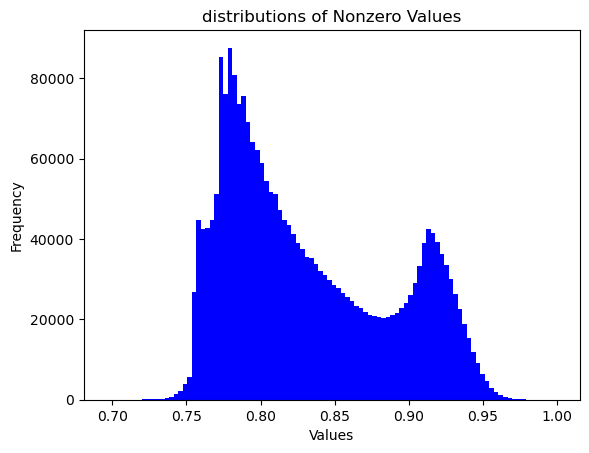

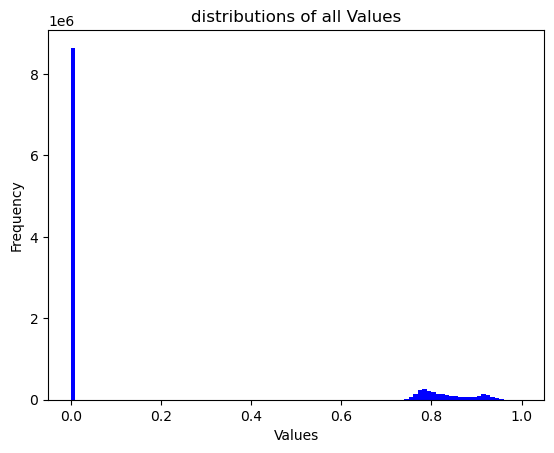

number of nonzero values = 2475374
Generated images:


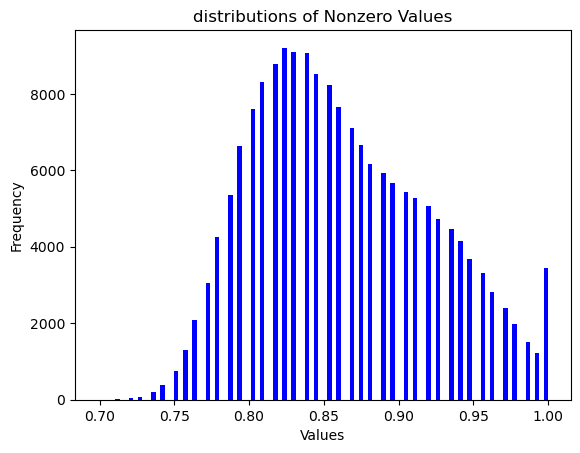

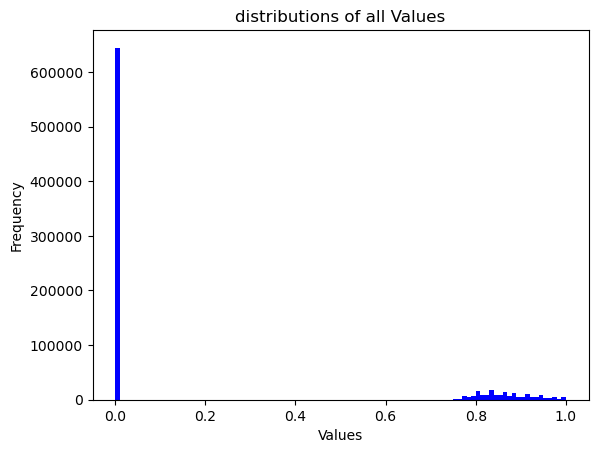

number of nonzero values = 181682


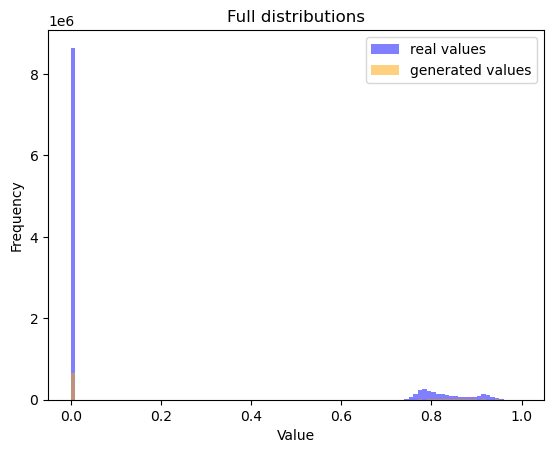

Full distribution:
KS Statistic: 0.05953812216765286
P-value: 0.0

According to regular significance level of 0.05:
The distributions are significantly different (reject H0)

According to large sample significance level of 0.05, giving significance level of 0.0015:
The distributions are significantly different (reject H0), KS statistic 0.0595 > 0.0015


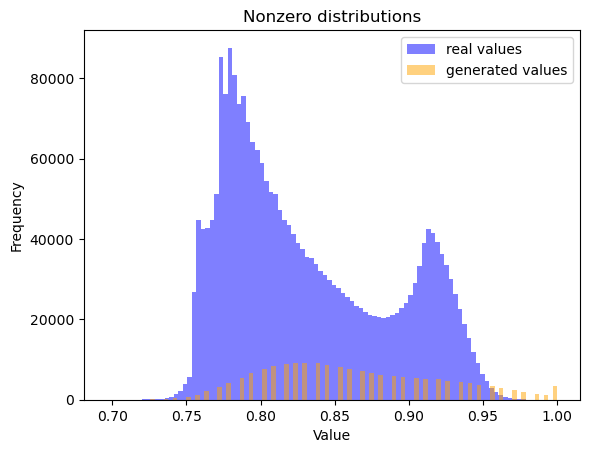

Nonzero distribution:
KS Statistic: 0.2769024602758518
P-value: 0.0

According to regular significance level of 0.05:
The distributions are significantly different (reject H0)

According to large sample significance level of 0.05, giving significance level of 0.0033:
The distributions are significantly different (reject H0), KS statistic 0.2769 > 0.0033


(0.05953812216765286, 0.2769024602758518)

In [96]:
variable_consistancy_check(nearest_con, False)
avg_branch = check_branch_length(nearest_con)
ks_test(original, nearest_con, dim = 1)